In [5]:
# Add the parent directory to the path so that we can import the src module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from src.visualization.vis3D import plot_table, plot_ball_states
from src.pingpong.table import TableConstants
from src.pingpong.ball import BallConstants
from src.ukf.state import StateVector
from src.ukf.ukf import fx

import numpy as np
import matplotlib.pyplot as plt

In [7]:
table = TableConstants() # Initialize table with defaults

ball = BallConstants() # Initialize ball with defaults

# Set the initial state of the ball
ball_state: StateVector = np.array([-1.5, 0.7, ball.radius + table.height, 0, 0, 0, 2, -1, 3, 0, 0, 0])
ball_states = [ball_state]

# Generate future ball states using the transition function
for i in range(10):
    ball_state = fx(ball_state, 0.1, ball)
    ball_states.append(ball_state)

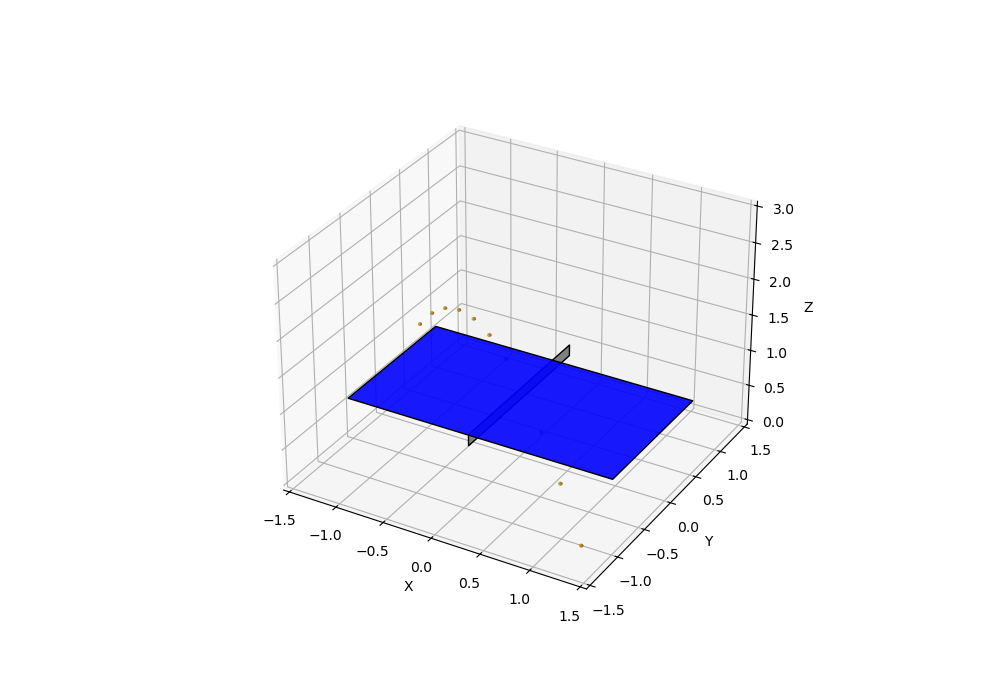

In [8]:
%matplotlib widget
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

plot_table(ax, table)
plot_ball_states(ax, ball, ball_states)

ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(0, 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()